WeatherPy

From the dataset we can see that the vast majority of the citites experienced high humidity (above 80%) on this day. We can also speculate that there are very few cities beyond -60 degrees latitude from our dataset as our random sample returned none beyond that paremeter. One final observation of the dataset is these cities experienced raltively little to no wind this day as the speeds were generally recorded under 10 m/s.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output file path
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

Perform API Calls

In [3]:
# Built url for API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_key}&units={units}&q="

# Lists to hold city data
number = int()
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

# For loop to grab city weather data with weather API
print(f"Beginning Data Retrieval")
print(f"--------------------")
for city in cities:
    number = number + 1
    
    # Exception to run through each city, collecting data and passing cities not found
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {number} | {city}")
    except:
        print(f"City not found. Skipping...")
        pass
print(f"--------------------")
print(f"Data Retrieval Complete")
print(f"--------------------")

Beginning Data Retrieval
--------------------
Processing Record 1 | atuona
Processing Record 2 | hilo
City not found. Skipping...
Processing Record 4 | palmer
Processing Record 5 | ushuaia
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | vaini
Processing Record 10 | qaanaaq
Processing Record 11 | mehamn
Processing Record 12 | ushibuka
Processing Record 13 | jamestown
Processing Record 14 | hobart
Processing Record 15 | kawalu
Processing Record 16 | razdolinsk
Processing Record 17 | hermanus
Processing Record 18 | sironko
Processing Record 19 | adrar
Processing Record 20 | ouesso
Processing Record 21 | belmonte
Processing Record 22 | saint-philippe
Processing Record 23 | cherskiy
Processing Record 24 | penzberg
Processing Record 25 | bathsheba
Processing Record 26 | lompoc
Processing Record 27 | boyolangu
Processing Record 28 | coquimbo
Processing Record 29 | busselton
Processing Record 30 | chapais
Processing Record 31 | clyde ri

Processing Record 252 | severo-kurilsk
Processing Record 253 | lar
Processing Record 254 | onalaska
Processing Record 255 | caravelas
Processing Record 256 | pacific grove
Processing Record 257 | koror
Processing Record 258 | thompson
Processing Record 259 | talnakh
Processing Record 260 | mamakan
Processing Record 261 | archidona
Processing Record 262 | lincoln
Processing Record 263 | flinders
City not found. Skipping...
Processing Record 265 | salalah
Processing Record 266 | tahta
Processing Record 267 | honningsvag
Processing Record 268 | san cristobal
City not found. Skipping...
Processing Record 270 | sile
Processing Record 271 | leningradskiy
Processing Record 272 | labuhan
Processing Record 273 | brigantine
Processing Record 274 | todos santos
Processing Record 275 | mount gambier
Processing Record 276 | berlevag
Processing Record 277 | yabelo
Processing Record 278 | celestun
Processing Record 279 | lovozero
Processing Record 280 | maldonado
Processing Record 281 | faanui
Proces

Processing Record 502 | angoram
Processing Record 503 | leua
Processing Record 504 | tabou
City not found. Skipping...
Processing Record 506 | kumluca
City not found. Skipping...
Processing Record 508 | canillo
Processing Record 509 | skjervoy
Processing Record 510 | marshall
City not found. Skipping...
Processing Record 512 | dunedin
City not found. Skipping...
Processing Record 514 | wagar
Processing Record 515 | albolote
Processing Record 516 | nanyamba
Processing Record 517 | roebourne
Processing Record 518 | chaadayevka
Processing Record 519 | taltal
Processing Record 520 | zabol
Processing Record 521 | conde
Processing Record 522 | yulara
Processing Record 523 | strezhevoy
Processing Record 524 | belyy yar
Processing Record 525 | ashland
Processing Record 526 | kuala terengganu
Processing Record 527 | songea
Processing Record 528 | tilichiki
Processing Record 529 | antalaha
Processing Record 530 | amurzet
Processing Record 531 | naryan-mar
Processing Record 532 | terrace bay
Proc

Convert Raw Data to DataFrame

In [4]:
# Create a dataframe and add city weather data
city_data = pd.DataFrame()

city_data['City'] = city_name
city_data['Lat'] = lat
city_data['Lng'] = lng
city_data['Max Temp'] = max_temp
city_data['Humidity'] = humidity
city_data['Cloudiness'] = clouds
city_data['Wind Speed'] = wind_speed
city_data['Country'] = country
city_data['Date'] = date

# Export city data to a csv
city_data.to_csv(output_file, encoding="utf-8", index=False)

# Visualize
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,26.03,75,21,6.87,PF,1608506082
1,Hilo,19.73,-155.09,27.00,74,75,2.10,US,1608505835
2,Palmer,42.16,-72.33,0.00,100,90,2.36,US,1608506083
3,Ushuaia,-54.80,-68.30,11.00,49,40,13.40,AR,1608505952
4,Vaini,-21.20,-175.20,29.00,79,20,7.20,TO,1608506084


In [5]:
# Describe function to return city data stats
city_stats = city_data[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]]

city_stats.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,21.996807,17.305895,9.819842,76.949123,54.143860,3.410193,1.608506e+09
std,32.864167,87.852924,16.478650,18.383320,38.950381,2.562460,6.993964e+01
min,-54.800000,-175.200000,-40.400000,14.000000,0.000000,0.030000,1.608506e+09
25%,-3.785000,-63.720000,0.000000,69.000000,14.000000,1.500000,1.608506e+09
50%,29.070000,22.740000,14.000000,81.000000,66.000000,2.850000,1.608506e+09
75%,48.507500,92.322500,23.812500,91.000000,90.000000,4.530000,1.608506e+09
max,78.220000,179.320000,32.000000,100.000000,100.000000,16.720000,1.608506e+09


In [6]:
# Indices of cities that have humidity over 100%.
high_humidity = city_data.loc[city_data["Humidity"]> 100]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


Latitude vs. Temperature Plot

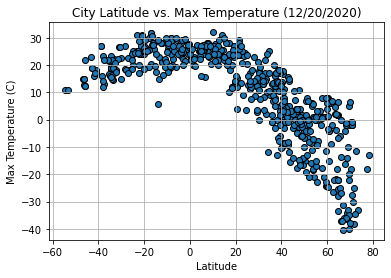

In [7]:
# Scatter plot for latitude vs max temp
x_values = city_data['Lat']
y_values = city_data['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig1.png")

plt.show()

This graph shows that as you increase in latitude, the max temperature of our cities dataset gets colder and colder. This shows the difference in max temperature of the cities location far north of the equator and modestly far south of the equator.

Latitude vs. Humidity Plot

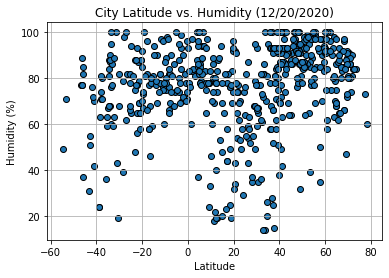

In [8]:
# Scatter plot for latitude vs humidity
x_values = city_data['Lat']
y_values = city_data['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Humidity (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig2.png")

plt.show()

This graph shows that most of our cities dataset featured high humidity above 60% with quite a few outliers below. We also notice how cities of the same latitiude could have had either high or low humidity this day meaning longitude probably is an important factor to consider.

Latitude vs. Cloudiness Plot

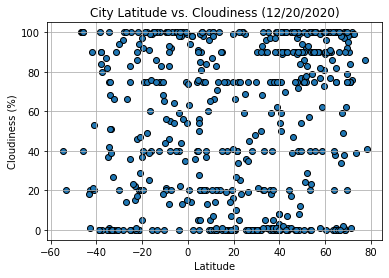

In [9]:
# Scatter plot for latitude vs cloudiness
x_values = city_data['Lat']
y_values = city_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig3.png")

plt.show()

This graph shows how most of the cities within our dataset saw either a mostly cloudy day or no clouds out all. There is quite a spread in the middle which could indicate that different cities are in currently in very different seasons.

Latitude vs. Wind Speed Plot

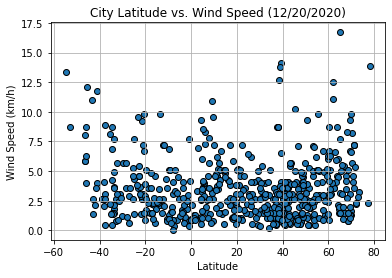

In [10]:
# Scatter plot for latitude vs wind speed
x_values = city_data['Lat']
y_values = city_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid()

# Saved plot as .png
plt.savefig("Fig4.png")

plt.show()

Most of our cities saw mild to no wind this day with only a few outliers above 10 m/s.

Linear Regression

Northern Hemisphere - Max Temp (C) vs. Latitude Linear Regression

In [11]:
northern_hemi = city_data.loc[city_data['Lat'] >= 0]

The r-value is: 0.6912070314851609


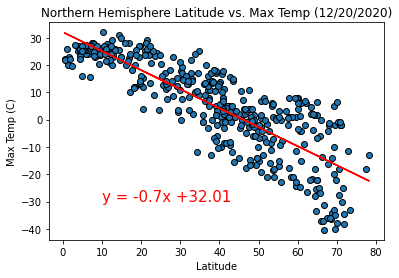

In [12]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']

# Linear regression on max temp vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for max temp vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Max Temp (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph shows a fairly nice indirect relationship with latitiude and max temperature. This tells us the further you go north the colder the max temeperature.

Southern Hemisphere - Max Temp (C) vs. Latitude Linear Regression

In [13]:
southern_hemi = city_data.loc[city_data['Lat'] <= 0]

The r-value is: 0.3007439360261538


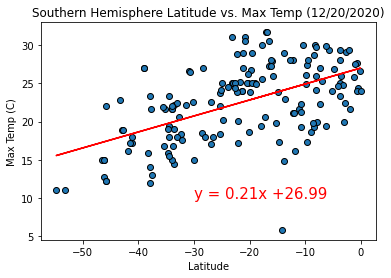

In [14]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']

# Linear regression on max temp vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for max temp vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Max Temp (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph shows a fairly nice direct relationship with latitiude and max temperature. This tells us the further you approach the equator from the bottom of the Earth, the higher the max temeperature.

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06834209458039478


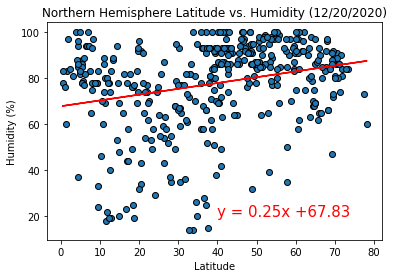

In [15]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']

# Linear regression on humidity vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for humidity vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Humidity (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

From this graph we can see that a decent majority of our cities in the northern hemisphere experienced relatively high humidity. This makes sense given relative humidity is genrally higher in winter which is the season a lot of these cities are currently in.

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11007465856752795


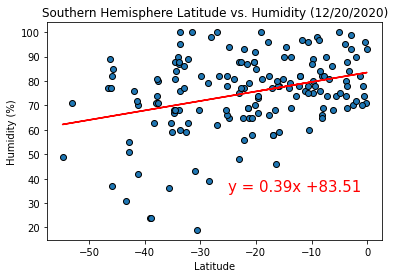

In [16]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']

# Linear regression on humidity vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for humidity vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Humidity (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,35),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph shows that southern hemisphere also experienced high humidity in these cities but it is much more spread out that the nothern hemisphere humidity vs latitude graph.

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07020887011239495


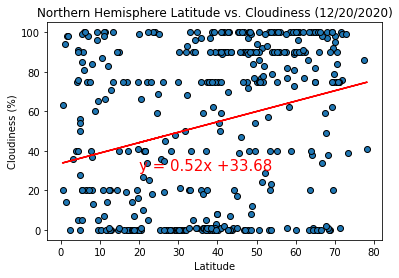

In [17]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']

# Linear regression on cloudiness vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for cloudiness vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Cloudiness (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph is similar to the first cloudienss vs latitude graph as we can see most cities experienced either a lot of cloudiness or none at all.

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.024164387394976297


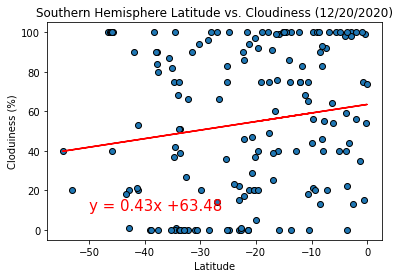

In [18]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']

# Linear regression on cloudiness vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for cloudiness vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Cloudiness (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloduiness (%)')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph shows a much more scattered spread of cities that expericed cloudiness of all different percentages. The different seasons the cities are currently in could explain this data further.

Northern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-value is: 0.010743510925852297


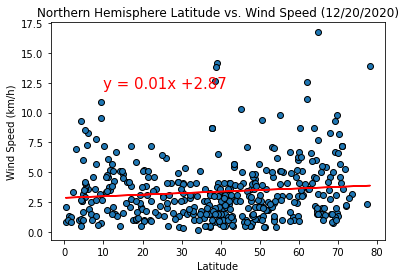

In [19]:
# Values for x and y axis
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']

# Linear regression on wind speed vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for wind speed vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere Latitude vs. Wind Speed (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph shows us that most of the cities in the nothern hemisphere experiences mild to no wind this day regardless of latitude.

Southern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-value is: 0.15080724078377042


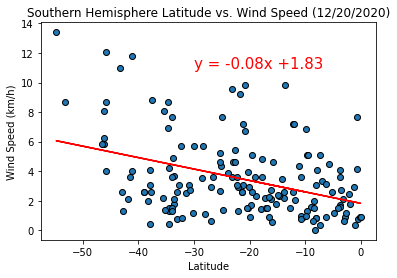

In [20]:
# Values for x and y axis
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']

# Linear regression on wind speed vs latitude and line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot for wind speed vs latitude and plot for linear regression
plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere Latitude vs. Wind Speed (12/20/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")

#Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

This graph shows us that cities in the southern hemisphere appear to experience generally slower wind speeds on this day than the cities located in the northern hemisphere.